# <center>Самостійна робота №6
## <center>Виконав: студент групи ПБ-21 мп Якобчук Євгеній
## <center>Варіант №5
## <center>Загальні завдання для всіх варіантів 

### 1. Завантажте навчальний набір даних за допомогою генератора. Сформуйте навчальну і тестову (та валідаційну – за бажанням) множини. Самостійно визначте оптимальний розмір зображень та розмір батчу. Під час формування навчальної множини використайте одну або декілька доступних опцій генератора для аугментації даних.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.regularizers import l2
from keras import utils
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [17]:
train_dir = 'E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр6/weather/train'
val_dir = 'E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр6/weather/train'
test_dir = 'E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр6/weather/test'

img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)
batch_size = 32

classes = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [18]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  rotation_range=15,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [19]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1044 images belonging to 4 classes.
Found 1044 images belonging to 4 classes.
Found 81 images belonging to 4 classes.


### 2. Перевірте роботу генератора на довільному одному зображенні.

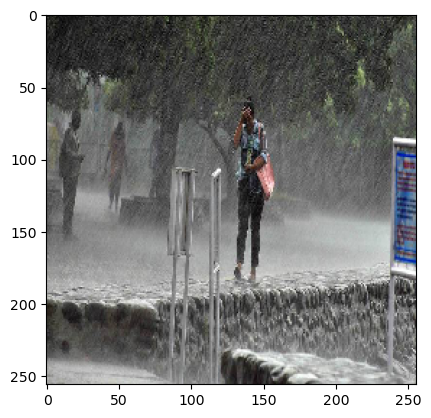

In [21]:
image_file_name = train_dir + '/Rain/rain11.jpg'
img = image.load_img(image_file_name, target_size=(256, 256))
plt.imshow(img)

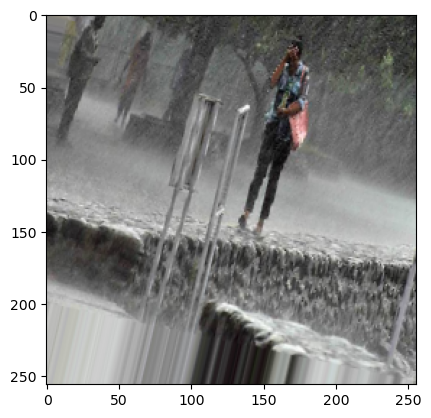

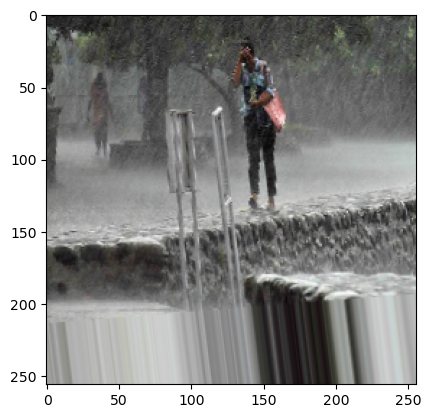

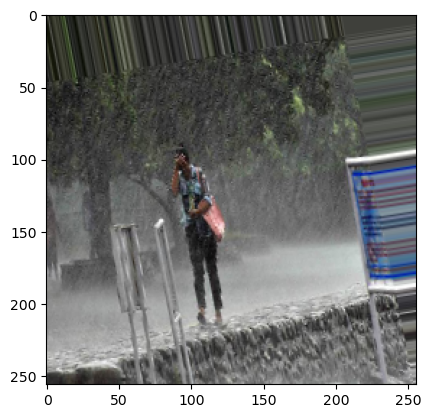

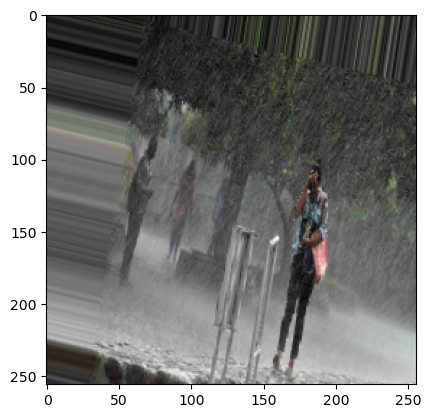

In [22]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### 3. Створіть та навчіть згорткову нейронну мережу для розпізнавання класів об’єктів на зображеннях. Побудуйте графік навчання.

In [23]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same', input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=["accuracy"])

In [25]:
history = model.fit(
            train_generator,
            steps_per_epoch = 20,
            epochs=50,
            validation_data=val_generator,
            validation_steps= 5)

Epoch 1/50
20/20 [==============================] - 55s 3s/step - loss: 10.8840 - accuracy: 0.4761 - val_loss: 10.8185 - val_accuracy: 0.5375
Epoch 2/50
20/20 [==============================] - 55s 3s/step - loss: 10.5408 - accuracy: 0.5094 - val_loss: 10.5130 - val_accuracy: 0.5312
Epoch 3/50
20/20 [==============================] - 54s 3s/step - loss: 10.2149 - accuracy: 0.5844 - val_loss: 10.2553 - val_accuracy: 0.6250
Epoch 4/50
20/20 [==============================] - 54s 3s/step - loss: 9.9144 - accuracy: 0.6500 - val_loss: 9.9450 - val_accuracy: 0.6250
Epoch 5/50
20/20 [==============================] - 53s 3s/step - loss: 9.6675 - accuracy: 0.6768 - val_loss: 9.7960 - val_accuracy: 0.5063
Epoch 6/50
20/20 [==============================] - 54s 3s/step - loss: 9.4564 - accuracy: 0.6561 - val_loss: 9.6076 - val_accuracy: 0.4688
Epoch 7/50
20/20 [==============================] - 54s 3s/step - loss: 9.2095 - accuracy: 0.6831 - val_loss: 9.2824 - val_accuracy: 0.6062
Epoch 8/50
20/

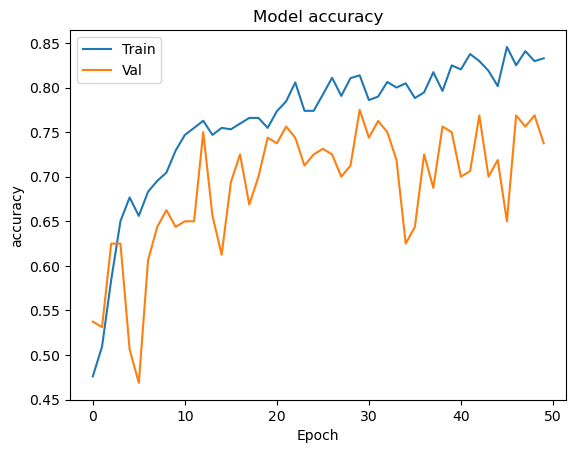

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### 4. Проведіть оцінку якості роботи навченої мережі на тестових даних.

In [27]:
scores = model.evaluate(test_generator)
print(f"Доля правильних відповідей на тестових даних: {(scores[1]*100):.2f}")

3/3 [==============================] - 1s 356ms/step - loss: 4.7851 - accuracy: 0.8395
Доля правильних відповідей на тестових даних: 83.95


### 5. Застосуйте навчену мережу для класифікації довільних зображень, які імпортуються в програму з жорсткого диску ПК.

In [28]:
from IPython.display import Image
from tkinter.filedialog import askopenfilename

(-0.5, 255.5, 255.5, -0.5)

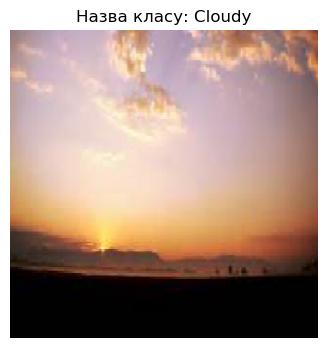

In [29]:
img_path = askopenfilename()
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = x.reshape(-1, 256, 256, 3)
prediction = model.predict(x)
prediction = np.argmax(prediction)
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Назва класу: {classes[prediction]}" )
plt.axis("off")